In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import run_model
from params import par_class
plt.style.use('science') # pip install git+https://github.com/garrettj403/SciencePlots.git

In [2]:
# Data
THs = [27-25, 42-25, 57-25]
zs  = [0.937, 0.802, 0.751]

In [3]:
# Function for computing MSDS
def get_msds(beta, rho):
    par = par_class()
    par.Nm = 80
    par.Nh = 12
    par.simN = 10_000
    par.beta = beta
    par.rho = rho
    zs_sim = []
    for TH in THs:
        par.TH = TH
        _, sim = run_model(par)
        z_mean = sim.z.mean()
        zs_sim.append(z_mean)
    mean_squared_dist = np.mean((np.array(zs) - np.array(zs_sim))**2)
    print(f'beta = {beta:.4f}, rho={rho:.4f}, and objective = {mean_squared_dist:.10f}')
    return mean_squared_dist

In [4]:
# Create arrays
rhos = np.concatenate(([0.4, 0.6, 0.8], np.linspace(1.2, 8.0, 35)))
betas = np.linspace(0.8, 1.0, 41)
msds_r = [get_msds(0.99, rho) for rho in rhos]
msds_b = [get_msds(beta, 4.8) for beta in betas]

beta = 0.9900, rho=0.4000, and objective = 0.2692586967
beta = 0.9900, rho=0.6000, and objective = 0.6950580000
beta = 0.9900, rho=0.8000, and objective = 0.6949578800
beta = 0.9900, rho=1.2000, and objective = 0.6950580000
beta = 0.9900, rho=1.4000, and objective = 0.6941710567
beta = 0.9900, rho=1.6000, and objective = 0.6408159100
beta = 0.9900, rho=1.8000, and objective = 0.4988173867
beta = 0.9900, rho=2.0000, and objective = 0.3847009200
beta = 0.9900, rho=2.2000, and objective = 0.3773928167
beta = 0.9900, rho=2.4000, and objective = 0.3650794167
beta = 0.9900, rho=2.6000, and objective = 0.3521079867
beta = 0.9900, rho=2.8000, and objective = 0.3357253767
beta = 0.9900, rho=3.0000, and objective = 0.3181038833
beta = 0.9900, rho=3.2000, and objective = 0.2958667467
beta = 0.9900, rho=3.4000, and objective = 0.2691351667
beta = 0.9900, rho=3.6000, and objective = 0.2372444967
beta = 0.9900, rho=3.8000, and objective = 0.2005234167
beta = 0.9900, rho=4.0000, and objective = 0.163

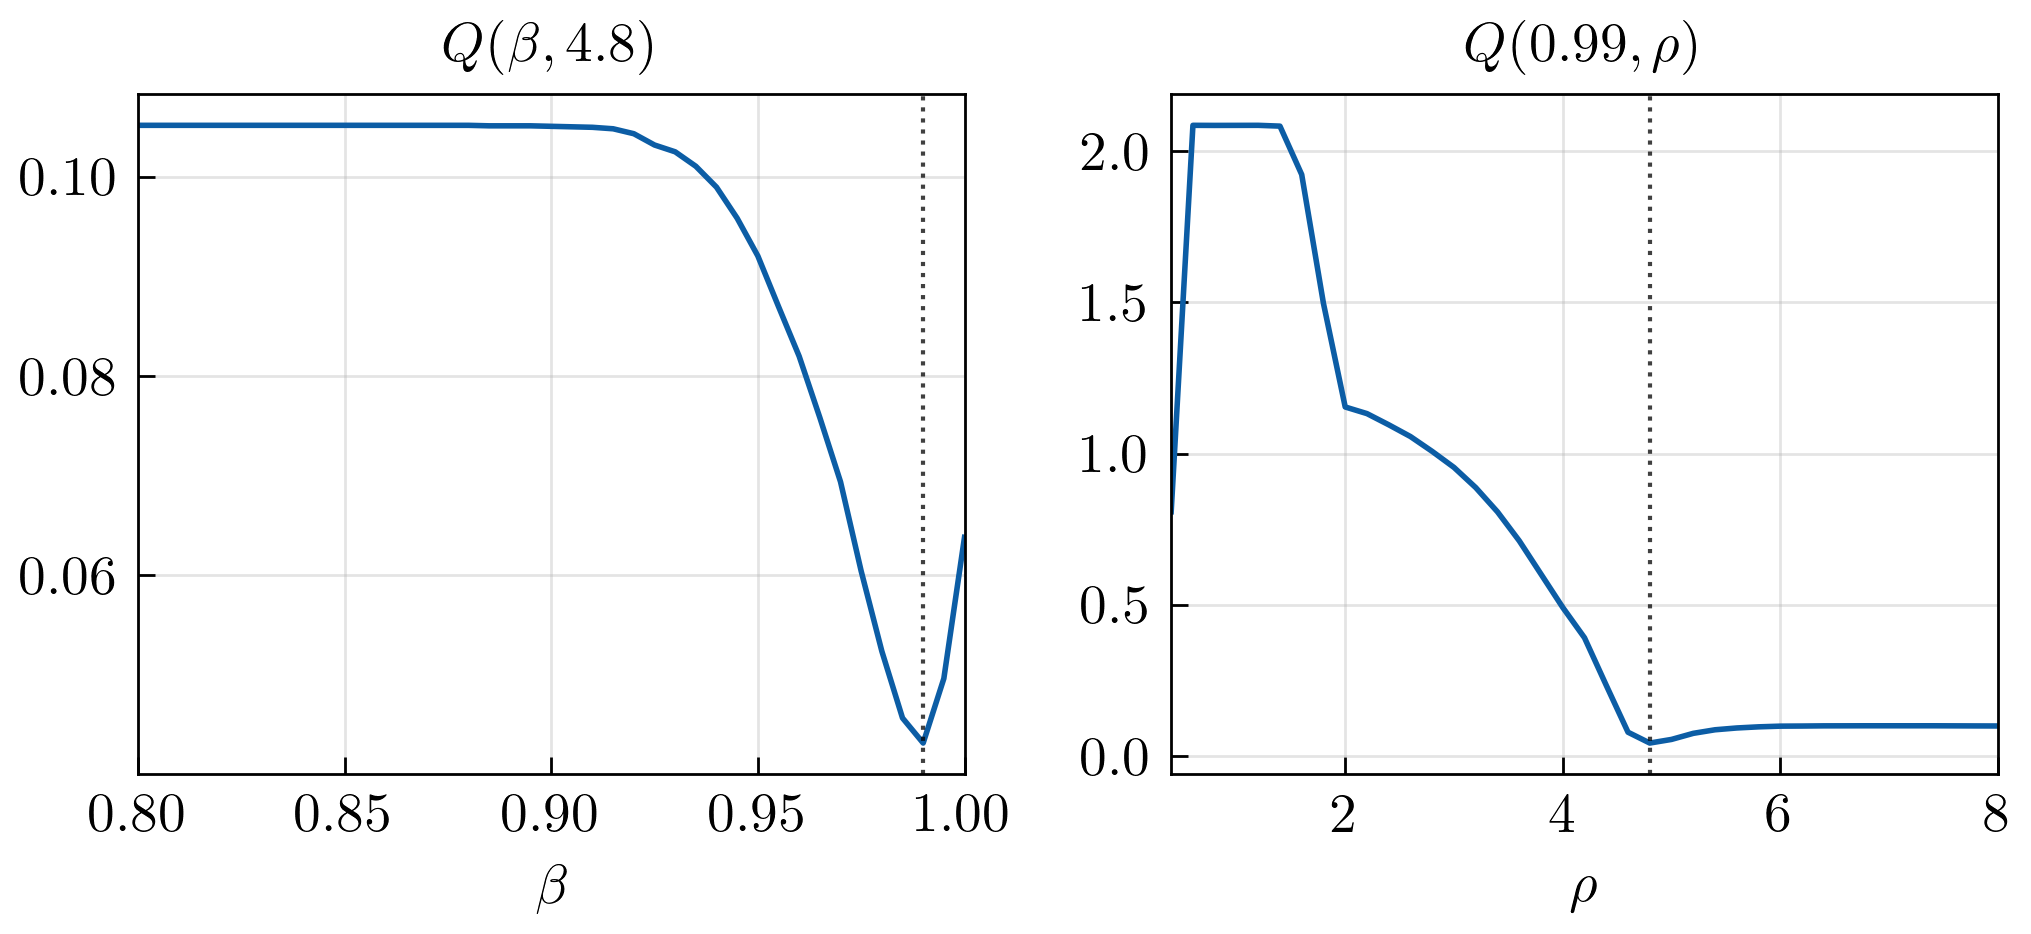

In [5]:
# Plot objective functions
fig,ax = plt.subplots(1,2,figsize=(6,2.25),dpi=400)
ax[0].plot(betas,3*np.array(msds_b))
ax[1].plot(rhos,3*np.array(msds_r))
ax[0].axvline(0.99, color='black', alpha=3/4, ls=':', lw=3/4)
ax[1].axvline(4.8, color='black', alpha=3/4, ls=':', lw=3/4)
ax[0].grid(alpha=1/3)
ax[1].grid(alpha=1/3)
ax[0].set_xlim([0.8,1.0])
ax[1].set_xlim([0.4,8.0])
ax[0].minorticks_off()
ax[1].minorticks_off()
ax[0].tick_params(top=False, right=False)
ax[1].tick_params(top=False, right=False)
ax[0].set_xlabel(r'$\beta$')
ax[1].set_xlabel(r'$\rho$')
ax[0].set_title(r'$Q(\beta,4.8)$', fontsize=10)
ax[1].set_title(r'$Q(0.99,\rho)$', fontsize=10)
fig.subplots_adjust(wspace=0.25)
plt.savefig(r'fig_objective.pdf')